In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os.path
import tensorflow as tf
import tensorflow_text as text
import heapq
from collections import defaultdict
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

data_path = '../local_data/'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oyka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
columns_to_drop = ['url', 'author', 'kind', 'language', 'language_score', 'media_urls', 'date']

def clean(df):
    df = df.drop(columns=columns_to_drop)
    df = df[df['score'] > 10]
    return df

In [20]:
df = pd.read_parquet(data_path + '0000.parquet')
cleaned_df = clean(df)
cleaned_df.to_parquet(data_path + 'cleaned_df.parquet')

In [12]:
cleaned_df = pd.read_parquet('cleaned_df.parquet')

In [13]:
print(cleaned_df.head())
print(cleaned_df.describe())

working_df = cleaned_df[0:1000000]

tokenizer = text.UnicodeScriptTokenizer()

tokenized = tokenizer.tokenize(working_df['text']).to_list()

print(tokenized[0])

         id   parent_id  post_id  \
0   kfrxfcr  t3_18vki9b  18vki9b   
1   kfrxfdj  t3_18vlhgc  18vlhgc   
2   kfrxfde  t3_18vkkxu  18vkkxu   
7   kfrxfds  t1_kfrbnij  18vfi1t   
15  kfrxfcq  t3_18vjbca  18vjbca   

                                                 text          subreddit  \
0   "devsisters is so generous guys"  the generosity:  CookieRunKingdoms   
1   Omar Epps waiting in the wings to star in the ...                nfl   
2   May 1899 be a better year for us all than 1899...       fallenlondon   
7   Yeah I remember a fair few posts around releas...             gaming   
15            “I do not gossip, I only speak truth” 😭       TikTokCringe   

    score  token_count  
0      35           13  
1     253           19  
2      39           15  
7      52           43  
15    107           15  
               score    token_count
count  319951.000000  319951.000000
mean       58.800679      42.973333
std       188.491731      70.894907
min        11.000000       1.000

[(20952, 'think'), (25491, 'people'), (25507, 'get'), (25762, 'would'), (26910, 'one'), (32251, 'It'), (31660, 'The'), (201038, 'I'), (26684, 'amp'), (43707, 'like')]
(20952, 'think')
(25491, 'people')
(25507, 'get')
(25762, 'would')
(26684, 'amp')
(26910, 'one')
(31660, 'The')
(32251, 'It')
(43707, 'like')
(201038, 'I')


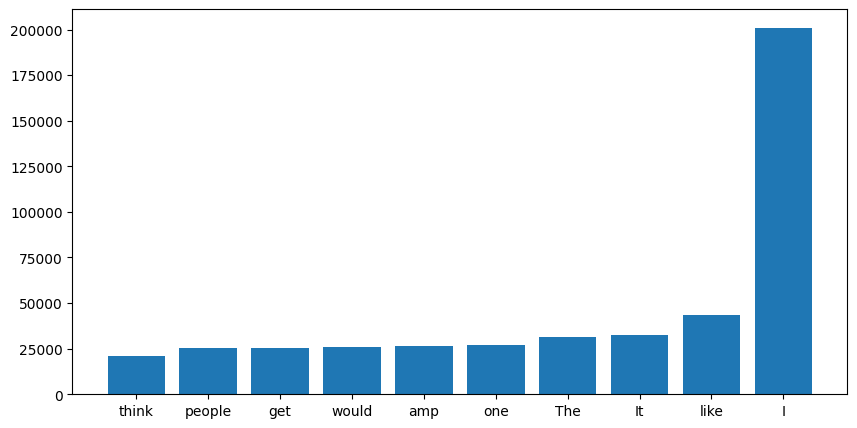

In [18]:
counts = defaultdict(int)

stop_words = set(stopwords.words('english'))

outliers = ['’']

for item in tokenized:
    for word in item:
        cur = word.decode('utf-8', errors='ignore')
        if cur in stop_words or cur in string.punctuation or cur in outliers:
            continue
        if cur in counts:
            counts[cur] += 1
        else:
            counts[cur] = 1

min_heap = []

for word, count in counts.items():
    heapq.heappush(min_heap, (count, word))
    if len(min_heap) > 10:
        heapq.heappop(min_heap)

print(min_heap)

min_heap.sort()

for i in range(10):
    print(min_heap[i])


# Draw a bar graph of the most used words
counts, words = zip(*min_heap)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.show()